In [1]:
from utils.binaries import *
from utils.plotting import *

07:59:32 (   +7.1s) [INFO   ] -- import logging
07:59:32 (    +2ms) [INFO   ] -- import numpy as np
07:59:32 (    +9ms) [INFO   ] -- import uncertainties
07:59:32 (    +2ms) [INFO   ] -- import numpy as np
07:59:32 (    +9ms) [INFO   ] -- import uncertainties
07:59:33 (  +299ms) [INFO   ] -- import pandas as pd
07:59:33 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
07:59:33 (    +2ms) [INFO   ] -- import binaries.tools as tools
07:59:33 (  +306ms) [INFO   ] -- import matplotlib.pyplot as plt
07:59:33 (  +376ms) [INFO   ] -- import seaborn as so
07:59:33 (    +2ms) [INFO   ] -- import plotting.tools as plot
07:59:33 (    +9ms) [DEBUG  ] -- font size set to 9.5
07:59:33 (    +1ms) [DEBUG  ] -- label size set to 13.0
07:59:33 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
07:59:33 (    +0ms) [DEBUG  ] -- markersize set to 2.0
07:59:33 (    +1ms) [DEBUG  ] -- usetex set to False


In [2]:
from Event import Event

class cfg_class():

    threshold : dict = {
        'wcd' : 0.2,
        'ssd' : 12,
    }

    occupancy : dict = {
        'wcd' : 12,
        'ssd' : 0,
    }

    multiplicity : dict = {
        'wcd' : 1,
        'ssd' : 0,
    }

In [7]:
test = Event("/cr/work/filip/SSDTriggerEfficiency/run01/DAT555039_000069.csv")
print(test)
print(len(test))

Station 4007 at 349m
Station 4018 at 388m
Station 4017 at 636m
Station 4019 at 658m
Station 4006 at 967m
Station 4034 at 979m
Station 4002 at 965m
Station 4036 at 1011m
Station 4035 at 1125m
Station 4001 at 1086m
Station 4016 at 1335m
Station 4008 at 1344m
Station 4033 at 1333m
Station 4037 at 1367m
Station 4003 at 1586m
Station 4005 at 1599m
Station 4059 at 1643m
Station 4009 at 1683m
Station 4056 at 1691m
Station 4060 at 1738m
Station 4015 at 1696m
Station 4057 at 1613m
Station 4010 at 2224m
Station 4012 at 2561m
Station 4032 at 1929m
Station 4052 at 2814m
Station 4058 at 1862m
Station 4053 at 2606m
Station 4031 at 2071m
Station 4020 at 1952m
Station 4021 at 2067m
Station 4030 at 2438m
Station 4078 at 2930m
Station 4044 at 3526m
Station 4055 at 2060m
Station 4054 at 2599m
Station 4004 at 1824m
Station 4051 at 3184m
Station 4061 at 2105m
Station 4013 at 2294m
Station 4022 at 2414m
Station 4011 at 2278m
Station 4216 at 2419m
Station 4074 at 4012m
Station 4027 at 3009m
Station 4014 at 2

[[<matplotlib.lines.Line2D at 0x7f822dc7b040>],

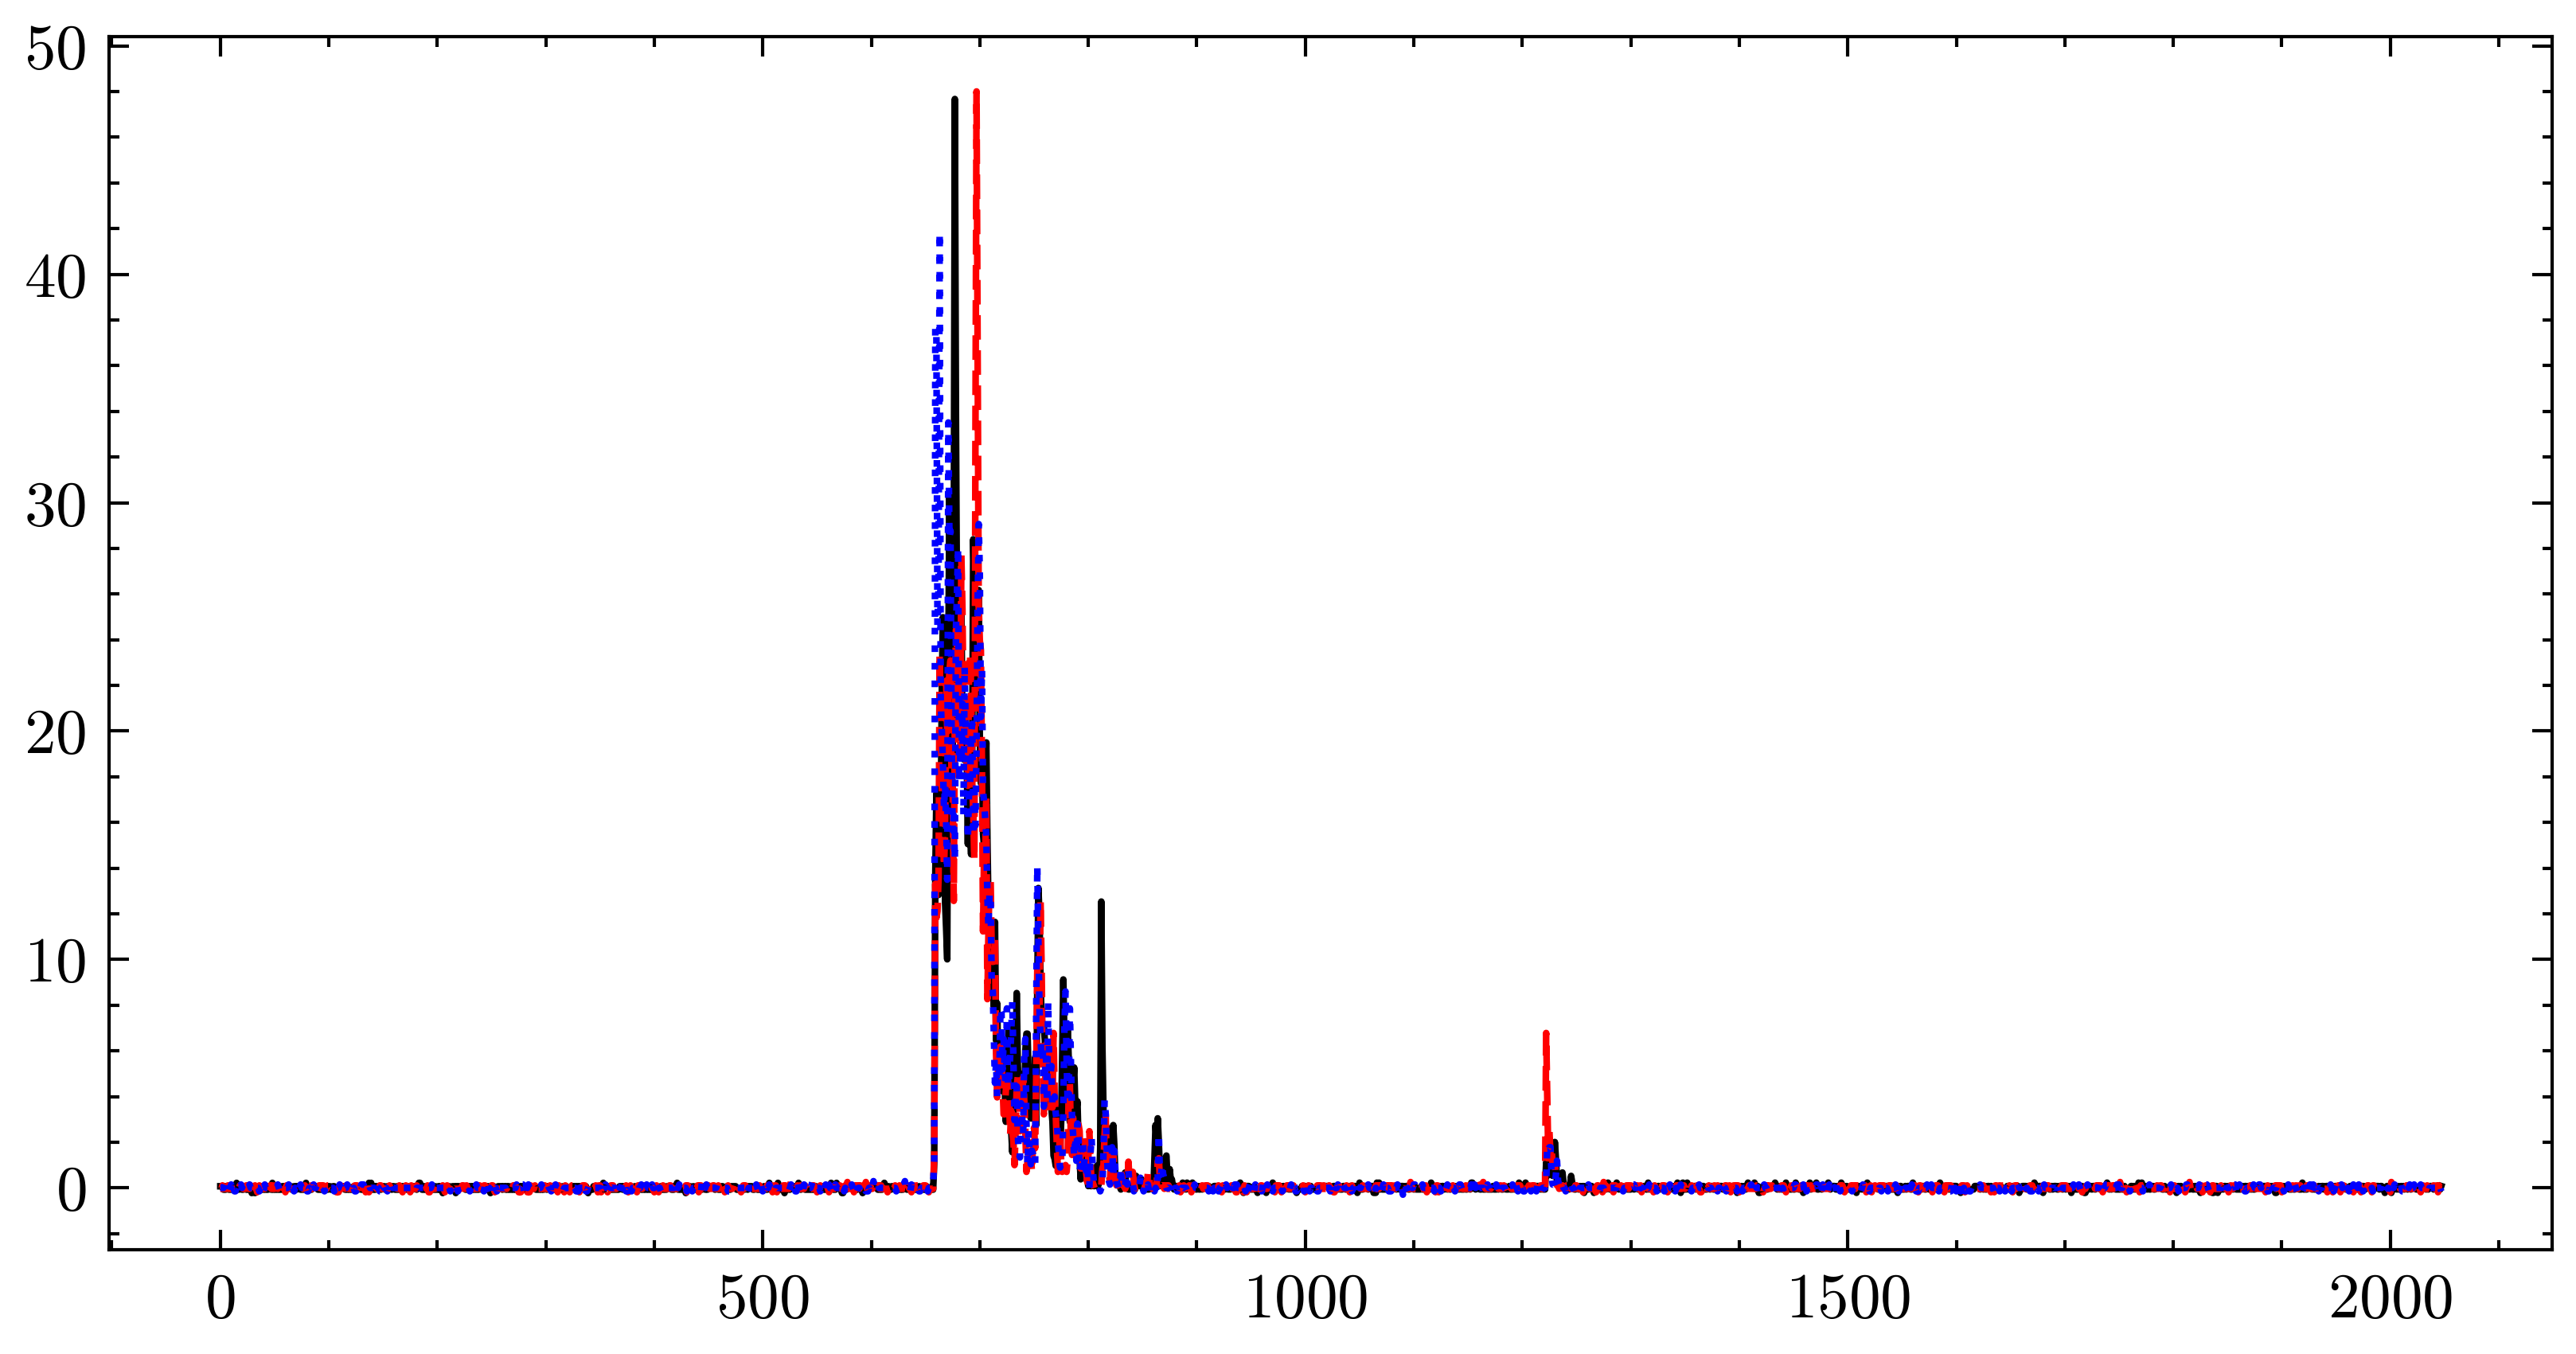

In [7]:
[plt.plot(range(2048), trace) for trace in test[4830].wcd_traces]
# plt.plot(range(2048), test[4751].ssd)

# plt.ylim(0, 0.2)
# plt.xlim(500, 1000)

In [ ]:
df1 = pd.read_csv('/cr/work/filip/SSDTriggerEfficiency/run01_evaluated/DAT010002_000000.csv', index_col='params')
df2 = pd.read_csv('/cr/work/filip/SSDTriggerEfficiency/run01_evaluated/DAT010002_000015.csv', index_col='params')

In [ ]:
df1


In [ ]:
df2

In [ ]:
df1 += df2

In [ ]:
df1

In [ ]:
def filter_close(col):
    spd = int(col)

    return spd < 750

cols_close = [col for col in df.columns if filter_close(col)]
df_close = df[cols_close]
df_close['sum_close'] = df_close.sum(axis=1, numeric_only=True)
df_close['n_close'] = len(cols_close)
cols_far = [col for col in df.columns if not filter_close(col)]
df_far = df[cols_far]
df_far['sum_far'] = df_far.sum(axis=1, numeric_only = True)
df_far['n_far'] = len(cols_far)

df_new = pd.concat([df_close[["sum_close", "n_close"]], df_far[["sum_far", "n_far"]]], axis=1)

In [ ]:
print(df_new)

In [ ]:
import uproot

file = '/cr/work/filip/SSDTriggerEfficiency/run01/DAT010002_000000.root'
root = uproot.open(file)

In [ ]:
print(root['AugerOffline']['Event'].keys())